In [105]:
 %reload_ext autoreload

In [106]:


from model.base import Base
from model.head import Head
import torch
import h5py
import numpy as np
import os
from utils import build_h5,extract_features, get_model_from_ckpt,train,eval,lr_scheduler, makedirs,save_model,logging
from torch.optim import Adam
import gc
import re
from dataloader import get_dataloader

hard_dp = False
if hard_dp:
    dropout = [0.5,0.5,0.75]
else:
    dropout = [0.25,0.25,0.5]

base_model_type = 'inceptionv3'
num_level = 11
feature_type = 'wide'
head_type = 'multi_3FC'
if feature_type == 'wide':
    head_type = 'pool_3FC'
resize = True
augment = True
root = './experiment/'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
folder = makedirs(root,base_model_type,num_level,feature_type,head_type,resize,augment,hard_dp)

splits = ['train', 'val', 'test']
h5_paths = [os.path.join(folder,split + '_fea.h5') for split in splits]

In [82]:
%autoreload
from dataloader import get_dataloader
extract_batch_size = 1

imgloaders = get_dataloader(data_type='img',resize=resize,augment=augment,finetune=True,\
                            batch_size = extract_batch_size, head_type = head_type)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


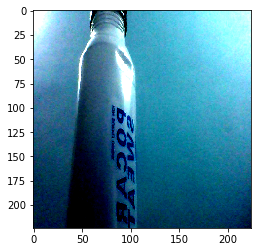

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


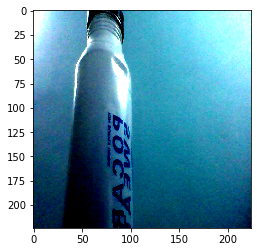

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


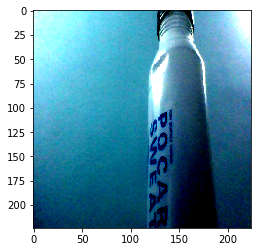

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


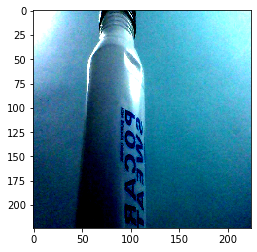

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


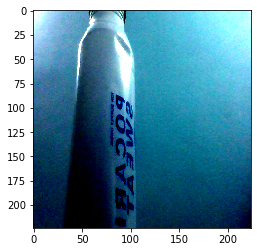

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


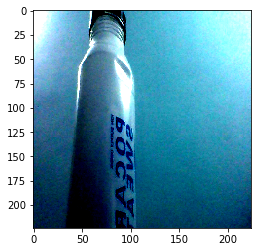

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


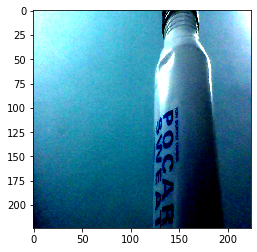

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


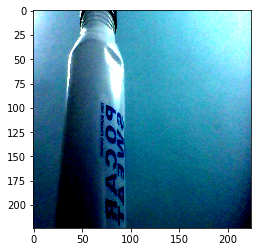

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


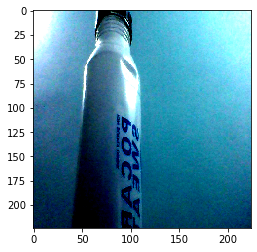

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


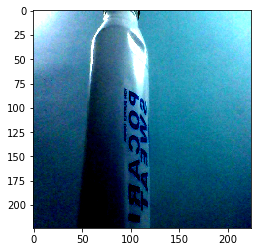

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


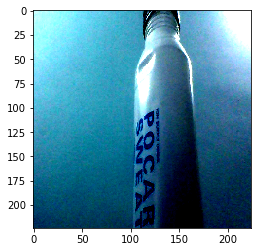

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


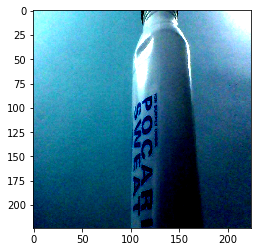

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


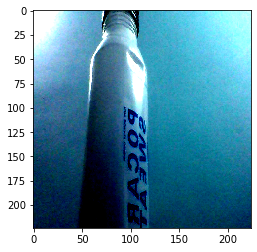

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


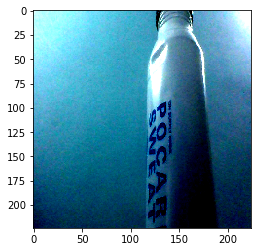

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


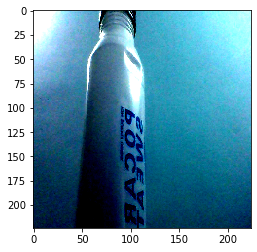

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


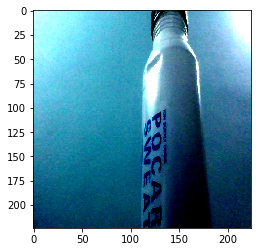

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


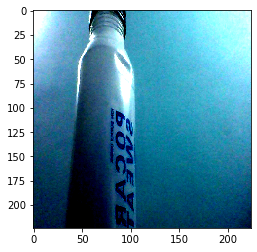

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


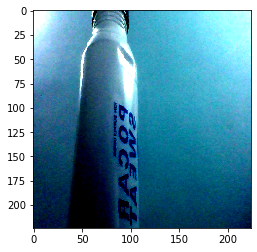

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


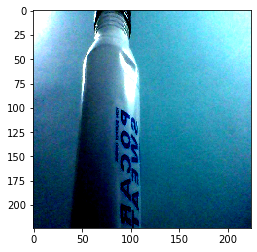

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([2])


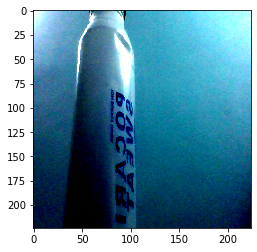

tensor([2])


In [84]:
import matplotlib.pyplot as plt
for batch, (feature, label) in enumerate(imgloaders[2]):
    plt.imshow(np.moveaxis(feature[0].numpy(),0,-1))
    plt.show()
    print(label[0])

In [87]:
import pandas as pd

df = pd.read_csv('./data/AVA.txt', header = None, delimiter = '\s+')
df.drop(columns = [0,12,13,14],inplace=True)


In [88]:
df['count'] = df.iloc[:,1:].sum(axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,count
0,953619,0,1,5,17,38,36,15,6,5,1,124
1,953958,10,7,15,26,26,21,10,8,1,2,126
2,954184,0,0,4,8,41,56,10,3,4,0,126
3,954113,0,1,4,6,48,37,23,5,2,2,128
4,953980,0,3,6,15,57,39,6,1,1,1,129


In [90]:
for i in range(1,11):
    df[i] = df[i]*i

In [91]:
df['MOS'] = df.iloc[:,1:].sum(axis=1)/df['count']
df.rename(columns = {1:'img'},inplace=True)

In [96]:
df.loc[(df.img==954113)]

,img,2,3,4,5,6,7,8,9,10,11,count,MOS
3,954113,0,3,16,30,288,259,184,45,20,2,128,7.617188


In [98]:
df.set_index('img',inplace=True)
df.drop(columns = df.columns[:-1],inplace=True)
df.to_csv('./data/label.csv')

In [103]:
df.index

Int64Index([953619, 953958, 954184, 954113, 953980, 954175, 953349, 953645,
            953897, 953841,
            ...
             57047,  56847,  57076,  57189,  56780,  56938,  57304,  56711,
             57303,  57221],
           dtype='int64', name='img', length=255530)

In [104]:
df.loc[954113]

MOS    7.617188
Name: 954113, dtype: float64

In [5]:
%cd ./SRP/AestheticPredictionMLSP/

F:\DA\SRP\AestheticPredictionMLSP
